In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from prophet import Prophet

**PROBLEM STATEMENT**

As Data Science team of Ad ease, we are trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that AdEase can predict and optimize the ad placement for the clients.

In [6]:
path_train="/content/drive/MyDrive/Dataset/train_1.csv"

In [7]:
path_exo="/content/drive/MyDrive/Dataset/Exog_Campaign_eng1.csv"

In [8]:
data=pd.read_csv(path_train)

In [10]:
exo=pd.read_csv(path_exo)

In [11]:
df=data.copy()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [13]:
data.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,1.243230e+05,1.242470e+05,1.245190e+05,1.244090e+05,1.244040e+05,1.245800e+05,1.243990e+05,1.247690e+05,1.248190e+05,1.247210e+05,...,1.412100e+05,1.414790e+05,1.418740e+05,1.413190e+05,1.411450e+05,1.413620e+05,1.412410e+05,1.412370e+05,1.414280e+05,1.415980e+05
mean,1.195857e+03,1.204004e+03,1.133676e+03,1.170437e+03,1.217769e+03,1.290273e+03,1.239137e+03,1.193092e+03,1.197992e+03,1.189651e+03,...,1.394096e+03,1.377482e+03,1.393099e+03,1.523740e+03,1.679607e+03,1.678302e+03,1.633966e+03,1.684308e+03,1.467943e+03,1.478282e+03
std,7.275352e+04,7.421515e+04,6.961022e+04,7.257351e+04,7.379612e+04,8.054448e+04,7.576288e+04,6.820002e+04,7.149717e+04,7.214536e+04,...,8.574880e+04,7.732794e+04,8.478533e+04,8.752210e+04,9.794534e+04,9.232482e+04,9.185831e+04,9.014266e+04,8.155481e+04,8.873567e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.400000e+01,1.400000e+01,...,2.200000e+01,2.200000e+01,2.000000e+01,2.100000e+01,2.200000e+01,2.300000e+01,2.400000e+01,2.300000e+01,2.300000e+01,2.100000e+01
50%,1.090000e+02,1.080000e+02,1.050000e+02,1.050000e+02,1.130000e+02,1.130000e+02,1.150000e+02,1.170000e+02,1.150000e+02,1.130000e+02,...,1.490000e+02,1.430000e+02,1.320000e+02,1.450000e+02,1.600000e+02,1.620000e+02,1.630000e+02,1.600000e+02,1.540000e+02,1.360000e+02
75%,5.240000e+02,5.190000e+02,5.040000e+02,4.870000e+02,5.400000e+02,5.550000e+02,5.510000e+02,5.540000e+02,5.490000e+02,5.450000e+02,...,6.070000e+02,5.980000e+02,5.690000e+02,6.280000e+02,6.590000e+02,6.680000e+02,6.540000e+02,6.490000e+02,6.350000e+02,5.610000e+02
max,2.038124e+07,2.075219e+07,1.957397e+07,2.043964e+07,2.077211e+07,2.254467e+07,2.121089e+07,1.910791e+07,1.999385e+07,2.020182e+07,...,2.420108e+07,2.253925e+07,2.505662e+07,2.586575e+07,2.834288e+07,2.691699e+07,2.702505e+07,2.607382e+07,2.436397e+07,2.614954e+07


In [14]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [15]:
# SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

**EDA**

In [16]:
data.shape

(145063, 551)

In [17]:
new_feature = data.Page.str.extract(r'(?P<title>.*)\_(?P<language>.*).wikipedia.org\_(?P<access_type>.*)\_(?P<access_origin>.*)')

new_feature[0:10]

,title,language,access_type,access_origin
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [18]:
df1 = pd.concat([new_feature, data], axis=1)

In [19]:
df1=df1.drop(columns=['Page'])

In [20]:
language_dict = {"es":"spanish", "zh":"chinese", "ru":"russian", "fr":"french", "de":"german", "en":"english", "ja":"japanese"}
df1["language"]=df1["language"].map(language_dict)

In [21]:
df1.head()

,title,language,access_type,access_origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,chinese,all-access,spider,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,chinese,all-access,spider,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,chinese,all-access,spider,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [22]:
 (df1.isna().sum()/df1.shape[0]*100).head(10)

title            12.308445
language         12.308445
access_type      12.308445
access_origin    12.308445
2015-07-01       14.297236
2015-07-02       14.349627
2015-07-03       14.162123
2015-07-04       14.237952
2015-07-05       14.241399
2015-07-06       14.120072
dtype: float64

In [23]:
 df1.isna().sum().head(10)

title            17855
language         17855
access_type      17855
access_origin    17855
2015-07-01       20740
2015-07-02       20816
2015-07-03       20544
2015-07-04       20654
2015-07-05       20659
2015-07-06       20483
dtype: int64

In [24]:
df1.shape

(145063, 554)

<Axes: >

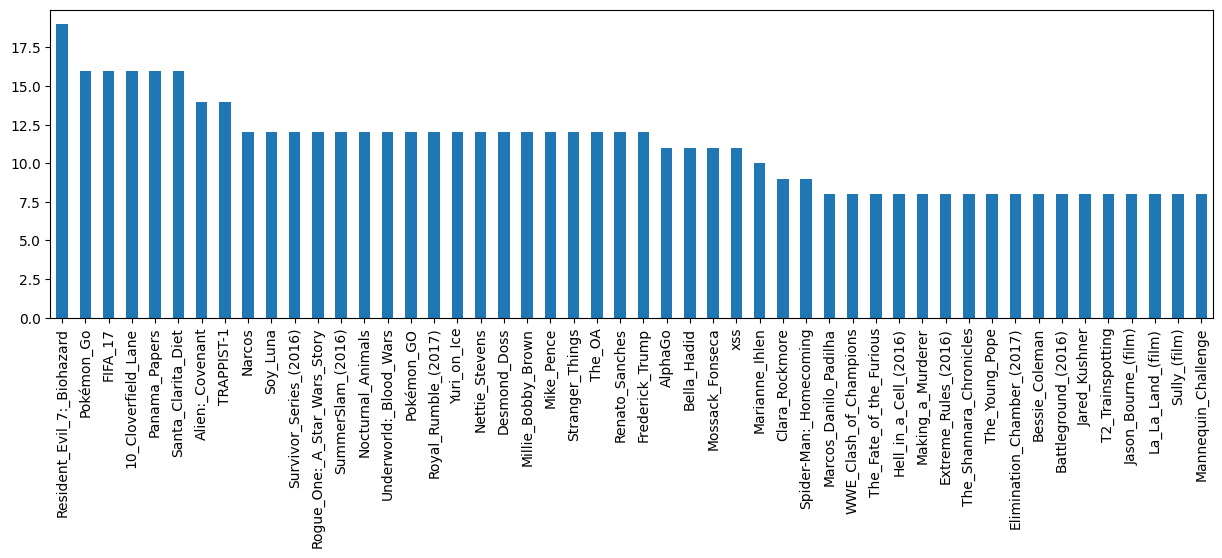

In [25]:
df1[df1.isna().any(axis=1)]['title'].value_counts().sort_values(ascending=False)[:50].plot(kind='bar', figsize=(15,4))

In [26]:
df1[df1.isna().any(axis=1)]['title'].value_counts().sort_values(ascending=False)[:5]

Resident_Evil_7:_Biohazard    19
Pokémon_Go                    16
FIFA_17                       16
10_Cloverfield_Lane           16
Panama_Papers                 16
Name: title, dtype: int64

In [27]:
df1[df1['title']=='Resident_Evil_7:_Biohazard']

,title,language,access_type,access_origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
6889,Resident_Evil_7:_Biohazard,french,desktop,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,157.0,129.0,83.0,94.0,130.0,128.0,154.0,153.0,126.0,93.0
11799,Resident_Evil_7:_Biohazard,english,desktop,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,4225.0,3526.0,2831.0,2703.0,3242.0,3727.0,3425.0,3235.0,3007.0,2522.0
15941,Resident_Evil_7:_Biohazard,russian,mobile-web,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,254.0,256.0,256.0,204.0,204.0,173.0,172.0,193.0,175.0
25112,Resident_Evil_7:_Biohazard,french,all-access,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,284.0,247.0,207.0,240.0,299.0,267.0,313.0,288.0,239.0,214.0
35650,Resident_Evil_7:_Biohazard,english,all-access,spider,NaN,NaN,NaN,NaN,NaN,NaN,...,86.0,58.0,89.0,94.0,42.0,34.0,30.0,53.0,54.0,25.0
40587,Resident_Evil_7:_Biohazard,english,all-access,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,7609.0,6593.0,5931.0,6214.0,7390.0,7799.0,7251.0,6846.0,6467.0,6114.0
49504,Resident_Evil_7:_Biohazard,german,all-access,spider,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68024,Resident_Evil_7:_Biohazard,german,desktop,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70574,Resident_Evil_7:_Biohazard,spanish,desktop,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,501.0,383.0,312.0,294.0,496.0,529.0,526.0,454.0,455.0,346.0
76064,Resident_Evil_7:_Biohazard,english,mobile-web,all-agents,NaN,NaN,NaN,NaN,NaN,NaN,...,3247.0,2954.0,2992.0,3377.0,4007.0,3941.0,3699.0,3485.0,3316.0,3462.0


In [28]:
#This topic has missing values in a lot of languages and how were they access and what type.

In [29]:
df1.head(2)

,title,language,access_type,access_origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,chinese,all-access,spider,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,chinese,all-access,spider,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0


Percentage of different Type
all-agents    66.59
spider        21.10
Name: access_origin, dtype: float64


<Axes: >

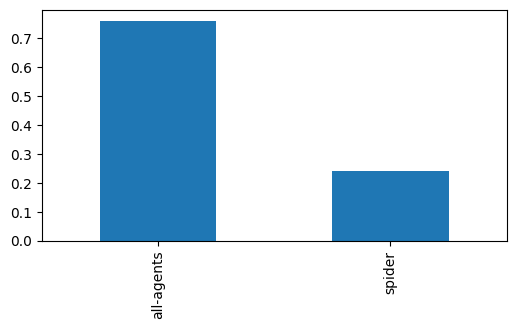

In [30]:
plt.figure(figsize=(6,3))
print("Percentage of different Type")
print(round(df1['access_origin'].value_counts()/df.shape[0] *100,2))
df1["access_origin"].value_counts(normalize=True).plot(kind="bar")

Percentage of different langugae
english     16.62
japanese    14.08
german      12.79
french      12.27
chinese     11.88
russian     10.36
spanish      9.70
Name: language, dtype: float64


<Axes: >

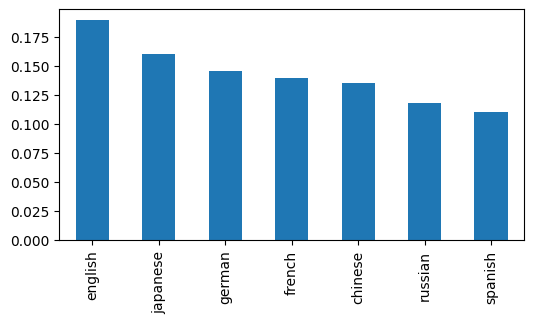

In [31]:
plt.figure(figsize=(6,3))
print("Percentage of different langugae")
print(round(df1['language'].value_counts()/df.shape[0] *100,2))
df1["language"].value_counts(normalize=True).plot(kind="bar")

Percentage of Access_type
all-access    45.30
mobile-web    21.32
desktop       21.07
Name: access_type, dtype: float64


<Axes: >

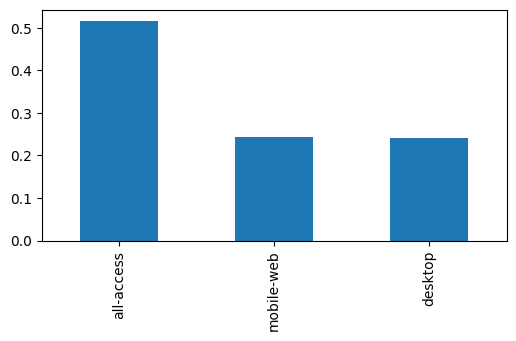

In [32]:
plt.figure(figsize=(6,3))
print("Percentage of Access_type")
print(round(df1['access_type'].value_counts()/df.shape[0] *100,2))
df1["access_type"].value_counts(normalize=True).plot(kind="bar")

In [33]:
#There are 3 types of access_type in which 50% of them are all access and almost 20-20% for mobile web and desktop.

# Views on english language is most while spanish has least amount of view.

# There are 2 types of access_origin where all agents has 70% of origin while spider has 30%.

### Converting timeseries to required format for model implementation

##### Missing value treatement: Treating missing value with its median

In [34]:
df_group = df1.groupby(["language"])[df1.columns[4:]].median()

In [35]:
df_group

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
language,,,,,,,,,,,,,,,,,,,,,
chinese,72.0,68.0,67.0,69.0,72.0,65.5,68.0,71.0,74.0,76.0,...,107.0,107.0,109.0,119.0,115.0,117.0,117.5,110.0,109.0,106.0
english,243.0,242.0,221.0,215.0,232.0,248.0,258.0,259.0,263.0,242.0,...,517.0,484.0,422.0,449.0,523.0,587.0,578.0,579.0,554.0,481.0
french,101.0,102.0,100.0,100.0,112.0,108.0,107.0,109.5,105.0,98.0,...,164.0,159.0,144.0,157.0,191.0,194.0,193.0,190.0,193.0,166.0
german,99.0,97.0,95.0,96.0,113.0,108.5,110.0,115.0,113.0,104.0,...,130.0,122.0,107.0,148.0,157.0,162.0,162.0,160.0,152.0,127.0
japanese,172.0,167.0,176.0,192.0,190.0,179.0,178.0,179.0,179.0,176.0,...,224.0,251.0,241.0,243.0,228.0,237.0,226.0,240.0,246.0,232.0
russian,180.0,183.0,182.0,177.0,189.0,194.0,191.0,190.0,194.0,232.0,...,336.0,332.0,334.0,363.0,344.0,324.0,313.0,301.0,276.0,218.0
spanish,368.0,362.0,322.0,261.0,311.0,376.0,371.0,364.0,357.0,318.0,...,230.0,188.0,144.0,148.0,216.0,229.0,237.0,228.0,203.0,160.0


In [36]:
dff=df_group.T
dff

language,chinese,english,french,german,japanese,russian,spanish
2015-07-01,72.0,243.0,101.0,99.0,172.0,180.0,368.0
2015-07-02,68.0,242.0,102.0,97.0,167.0,183.0,362.0
2015-07-03,67.0,221.0,100.0,95.0,176.0,182.0,322.0
2015-07-04,69.0,215.0,100.0,96.0,192.0,177.0,261.0
2015-07-05,72.0,232.0,112.0,113.0,190.0,189.0,311.0
...,...,...,...,...,...,...,...
2016-12-27,117.0,587.0,194.0,162.0,237.0,324.0,229.0
2016-12-28,117.5,578.0,193.0,162.0,226.0,313.0,237.0
2016-12-29,110.0,579.0,190.0,160.0,240.0,301.0,228.0
2016-12-30,109.0,554.0,193.0,152.0,246.0,276.0,203.0


In [37]:
dff.index
#index of dff type is of object ,we want it to be in datetime

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [38]:
t_index=pd.Series(dff.index)
t_index=t_index.apply(lambda x: np.datetime64(x))
dff.index=t_index

In [39]:
dff.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=550, freq=None)

In [40]:
dff.isna().sum().sum()

0

In [41]:
# All the missing values has been treated

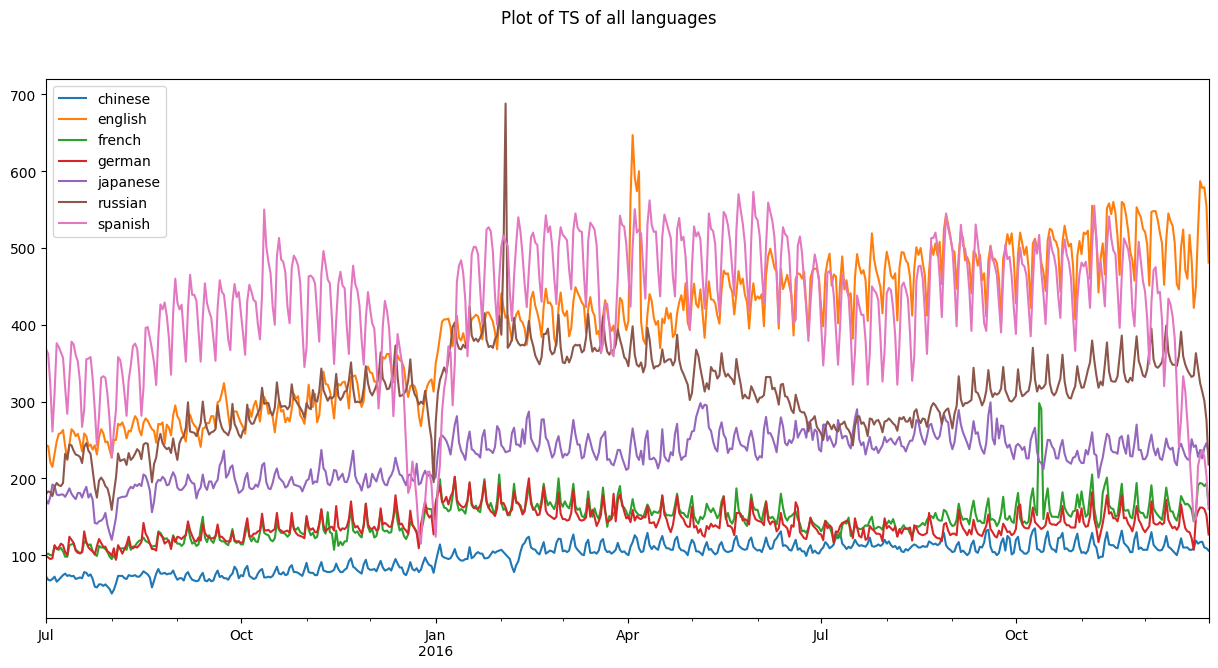

In [43]:
plt.suptitle("Plot of TS of all languages")
for i in dff.columns:
    dff[i].plot(x=dff.index,figsize=(15,7))
plt.legend()

In [44]:
# # We can see few anamolies and outliers , we will treat it.

In [45]:
col=list(dff.columns)
col

['chinese', 'english', 'french', 'german', 'japanese', 'russian', 'spanish']

[]

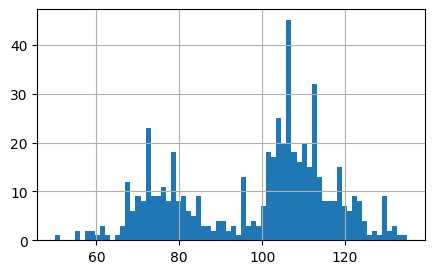

In [46]:
plt.figure(figsize=(5,3))
plt.subplot()
dff.chinese.hist(bins=70).plot()

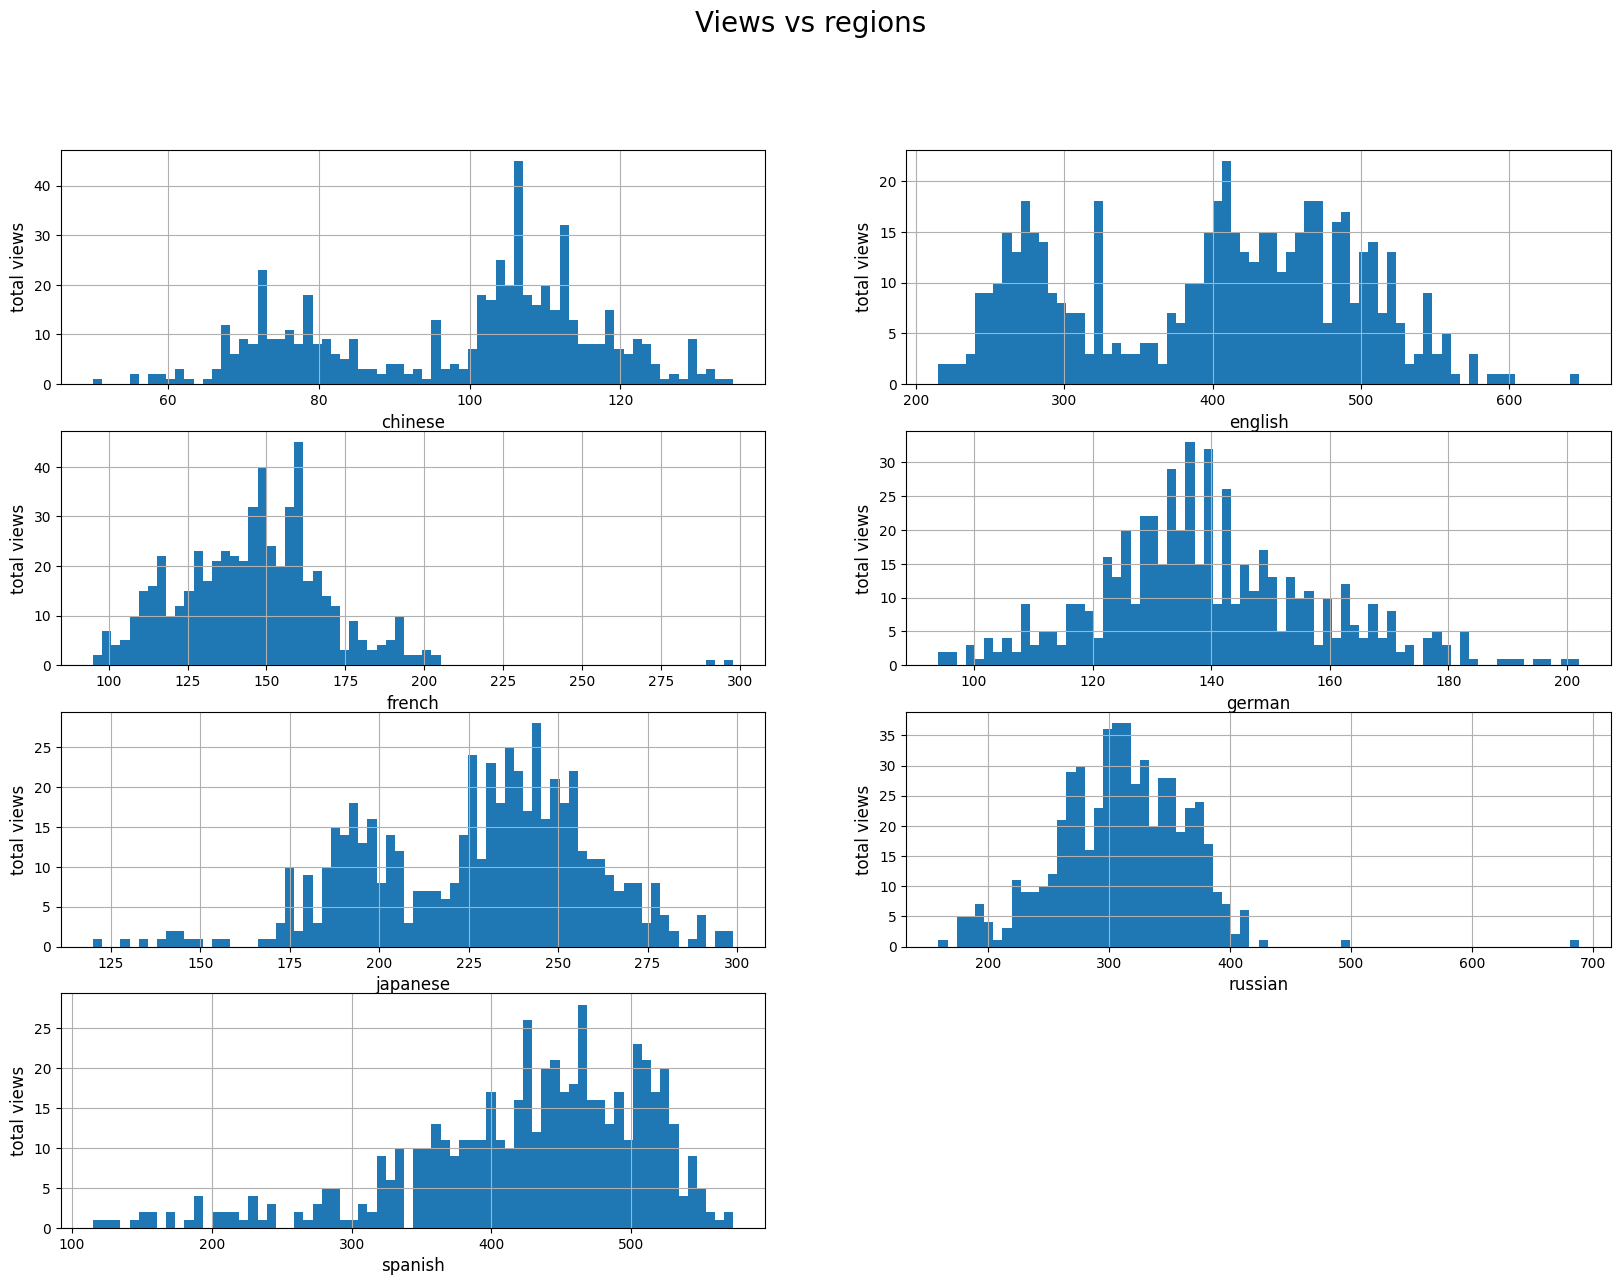

In [49]:
plt.figure(figsize=(20,14)).suptitle("Views vs regions",fontsize=20)
for i in range(len(col)):
    plt.subplot(4, 2, i+1)
    dff[col[i]].hist(bins=70).plot()
    plt.xlabel(col[i], fontsize=12)
    plt.ylabel('total views', fontsize=12)

In [50]:
### Cleary there are few outliers in some of the plot. We will clip it for top 5 percentile and lower 2 percentile.

In [51]:
for i in col:
    upp=dff[i].quantile(0.95)
    low=dff[i].quantile(0.02)
    dff[i] = dff[i].clip(upper=upp, lower=low)

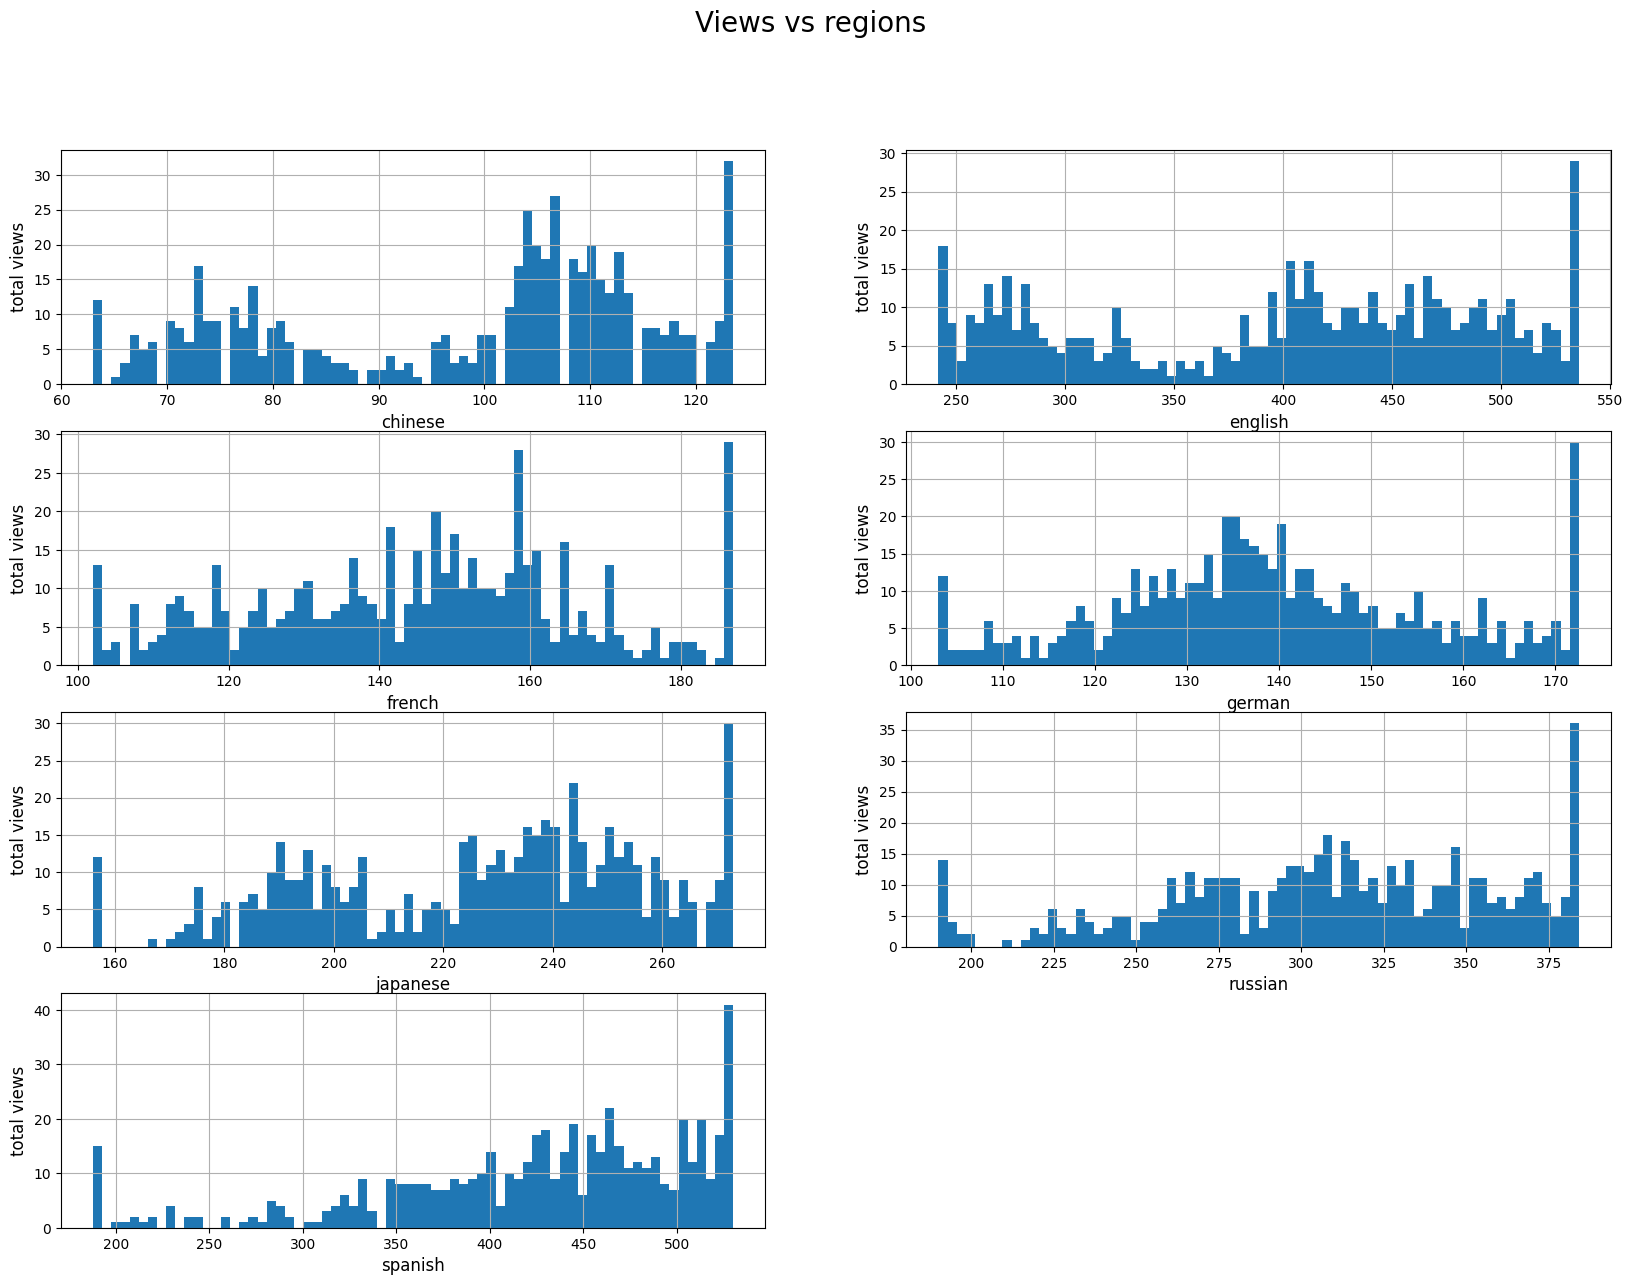

In [52]:
plt.figure(figsize=(20,14)).suptitle("Views vs regions",fontsize=20)
for i in range(len(col)):
    plt.subplot(4, 2, i+1)
    dff[col[i]].hist(bins=70).plot()
    plt.xlabel(col[i], fontsize=12)
    plt.ylabel('total views', fontsize=12)

In [53]:
# All the outliers are removed.

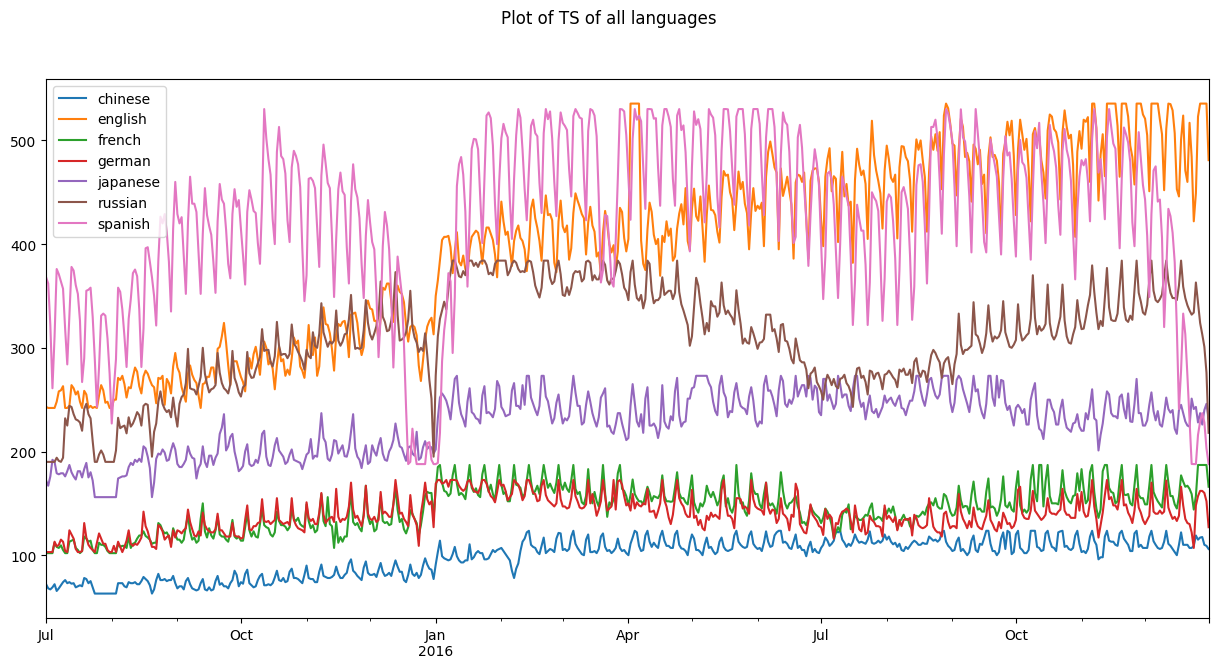

In [54]:
plt.suptitle("Plot of TS of all languages")
for i in dff.columns:
    dff[i].plot(x=dff.index,figsize=(15,7))
plt.legend()

#### Decomposition of time **series**

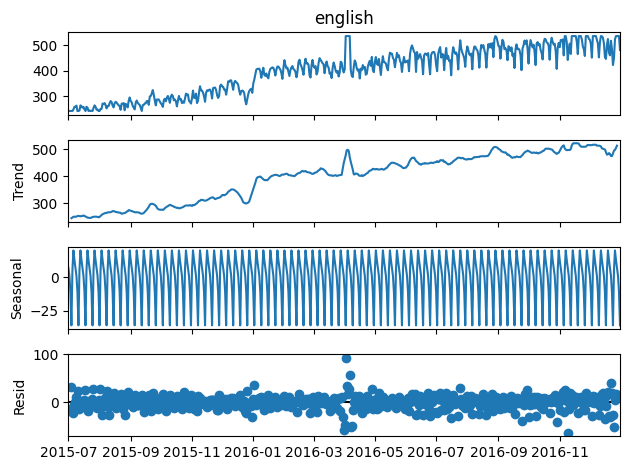

In [55]:
model = sm.tsa.seasonal_decompose(dff['english'], model='additive')
decomposed=model.plot()

<Axes: >

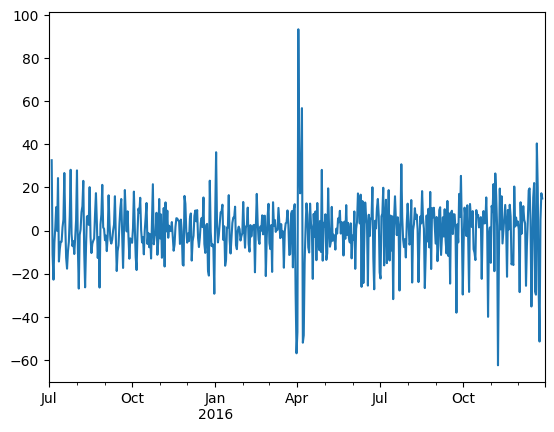

In [56]:
model.resid.plot()

<Axes: >

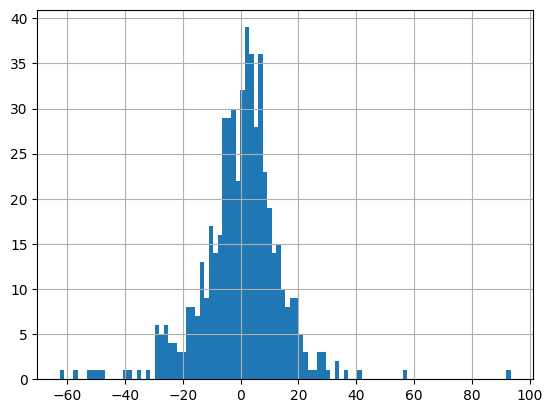

In [57]:
model.resid.hist(bins=100)

In [58]:
model.resid.mean()

-0.005589818344902085

In [59]:
## Very negligible residual mean

#### STationarity

In [60]:
for i in col:
    p_value=sm.tsa.stattools.adfuller(dff['english'])[1]
    if p_value<0.05:
        print(f"{i} is stationary")
    else:
        print(f"{i} is non stationary")

chinese is non stationary
english is non stationary
french is non stationary
german is non stationary
japanese is non stationary
russian is non stationary
spanish is non stationary


In [61]:
### All the languages views are non stationary

#### **Differencing**

<Axes: >

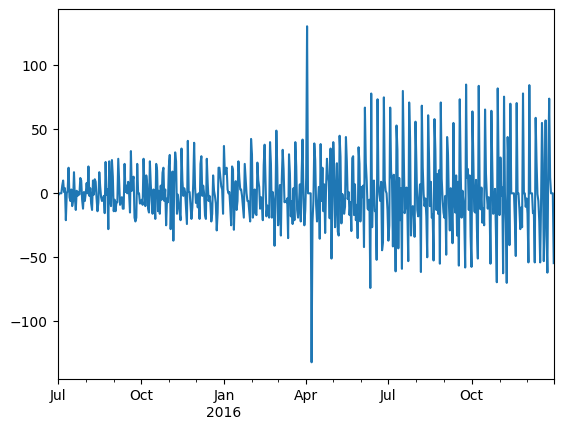

In [62]:
# Detrending i.e differencing with 1
detrend = dff['english'].diff()
detrend.plot()

In [63]:
p_value=sm.tsa.stattools.adfuller(detrend.dropna())[1]
if p_value<0.05:
    print(f"English is stationary")
else:
    print(f"English is non stationary")

English is stationary


<Axes: >

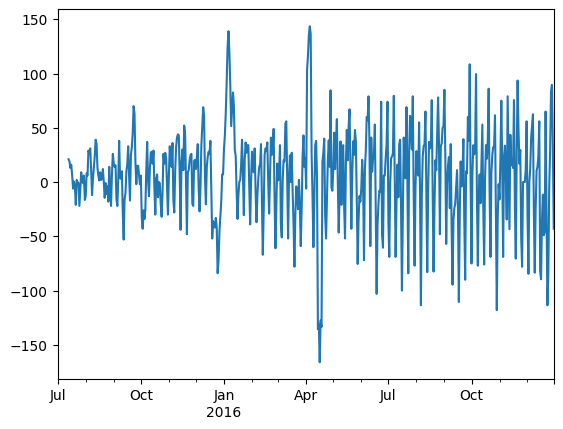

In [64]:
# de-seasonalisation
deseas = dff['english'].diff(12)
deseas.plot()

In [66]:
p_value=sm.tsa.stattools.adfuller(deseas.dropna())[1]
if p_value<0.05:
    print(f"English is stationary")
else:
    print(f"English is non stationary")

English is stationary


In [67]:
#### Upon differencing, both detrended and de-seasonal time series came out to be stationary.

#### AutoCorrelation and *PartialAutoCorrelation*

##### ACF

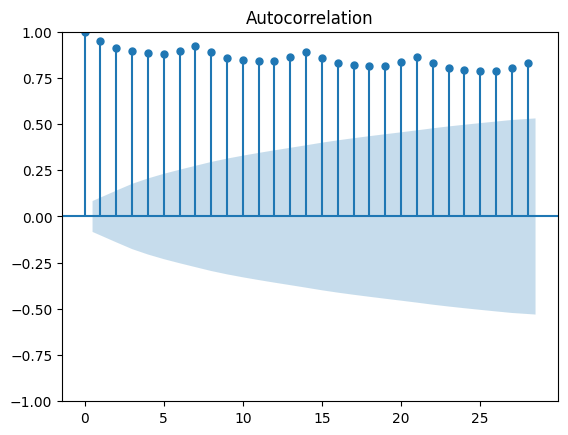

In [68]:
plot_acf(dff['english']);

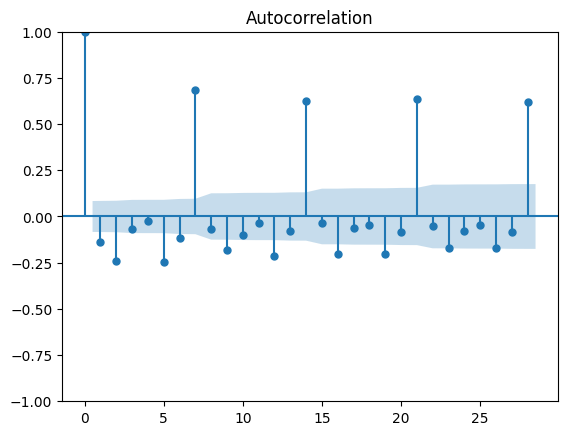

In [69]:
# for detrended time-series
plot_acf(dff['english'].diff().dropna());

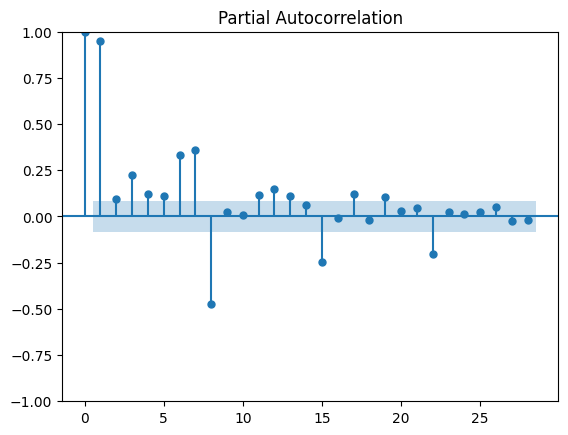

In [70]:
plot_pacf(dff['english']);

In [71]:
#### From both ACF and PACF , we can observe some kind seasonality for m=7

#### Train-Test Split and Metrics

In [72]:
exo.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [73]:
dff['exog']=exo["Exog"].values

In [74]:
#last 12 months as test
train_max_date = dff.index[-12]
train_x = dff.loc[dff.index < dff.index[-12]].copy()
test_x = dff.loc[dff.index >= dff.index[-12]].copy()

test_x['english']

2016-12-20    471.00
2016-12-21    460.00
2016-12-22    517.00
2016-12-23    484.00
2016-12-24    422.00
2016-12-25    449.00
2016-12-26    523.00
2016-12-27    535.55
2016-12-28    535.55
2016-12-29    535.55
2016-12-30    535.55
2016-12-31    481.00
Name: english, dtype: float64

In [75]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

### MODEL FOUNDATION

#### MEAN MODEL

MAE : 99.259
RMSE : 106.313
MAPE: 0.195


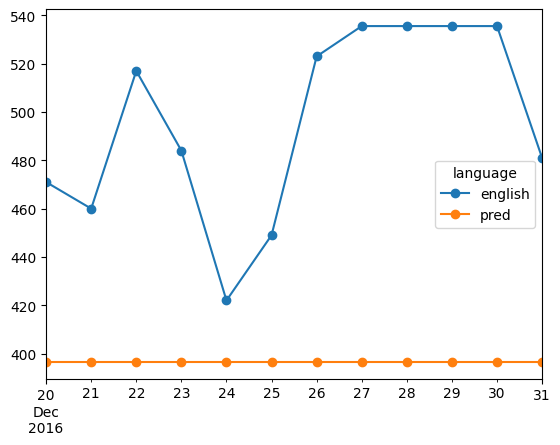

In [76]:
#train mean as test predicted
test_x['pred'] = train_x['english'].mean()

test_x[['english','pred']].plot(style='-o')

performance(test_x['english'], test_x['pred'])

#### Naive Forecasts

MAE : 35.933
RMSE : 47.405
MAPE: 0.078


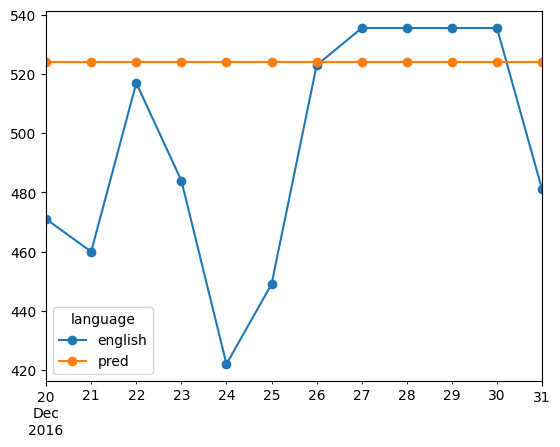

In [77]:
## Last value as the value at all future values: high variance model
test_x['pred'] = train_x['english'][-1]

test_x[['english','pred']].plot(style='-o')

performance(test_x['english'], test_x['pred'])

#### Seasonal Naive forecast

MAE : 35.933
RMSE : 47.405
MAPE: 0.078


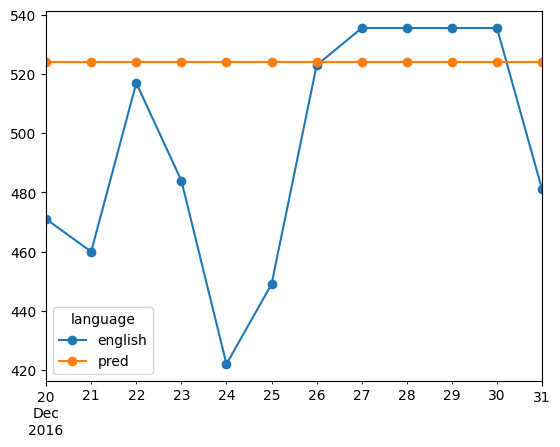

In [83]:
## Seasonal Naive forecast:  1 year based on ACF and PACF plots
for i in test_x.index:
  test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(day=7)]['english']

test_x[['english','pred']].plot(style='-o')

performance(test_x['english'], test_x['pred'])

#### Triple Exponential Smoothing (Holt-Winter's Model)

<Axes: >

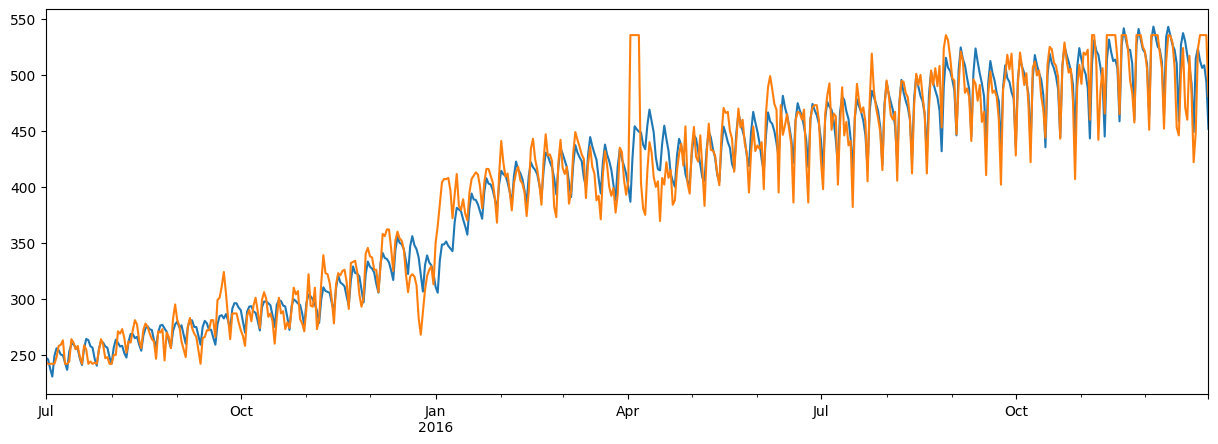

In [84]:
## seasonality="add"
plt.figure(figsize=(15,5))
model = sm.tsa.ExponentialSmoothing(dff['english'], trend='add', seasonal='add').fit(smoothing_level=1/(2*7))
model.fittedvalues.plot()
dff['english'].plot()

<Axes: >

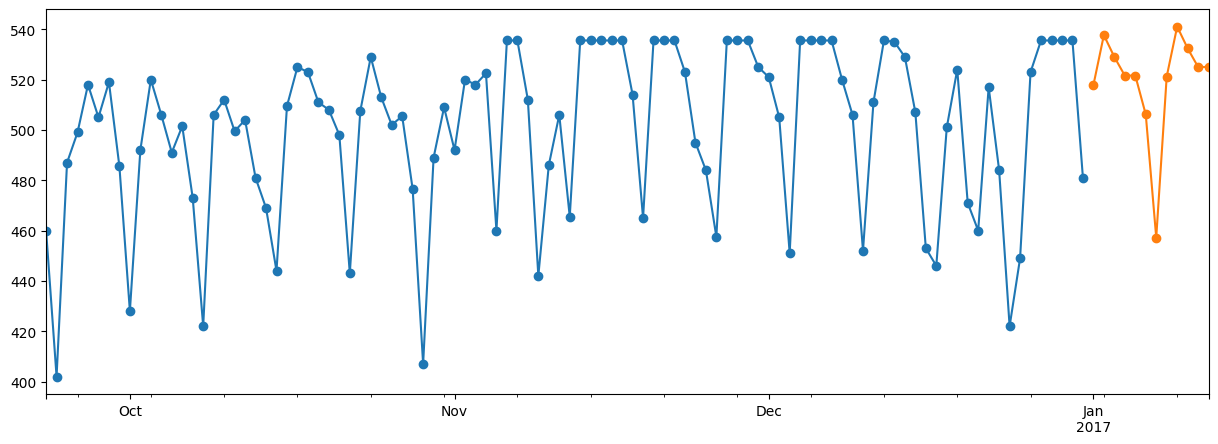

In [85]:
plt.figure(figsize=(15,5))
pred = model.forecast(steps = 12)
dff['english'].tail(100).plot(style='-o')
pred.plot(style='-o')

MAE : 28.977
RMSE : 37.276
MAPE: 0.061


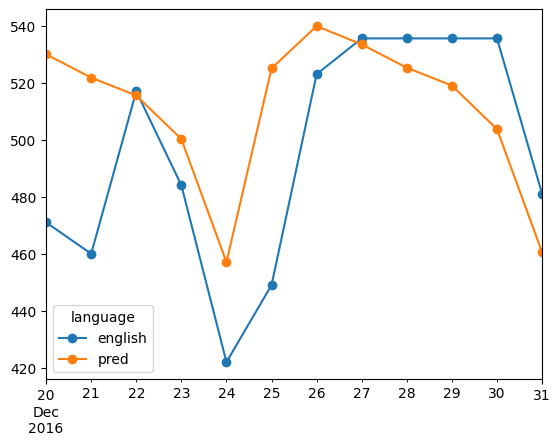

In [93]:
model = sm.tsa.ExponentialSmoothing(train_x['english'], trend='add', seasonal='add').fit(smoothing_level=1/(2*7))
test_x['pred'] = model.forecast(steps=12)
test_x[['english','pred']].plot(style='-o')
performance(test_x['english'], test_x['pred'])

#### ARIMA MODEL (p,d,q)

##### AR(p) model

In [94]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_values=[]
for i in range(1,15):
    model = SARIMAX(train_x['english'], order=(i, 0, 0))
    model = model.fit(disp=False)
    test_x['pred'] = model.forecast(steps=12)
    mape_values.append(round(mape(test_x['english'], test_x['pred']), 3))

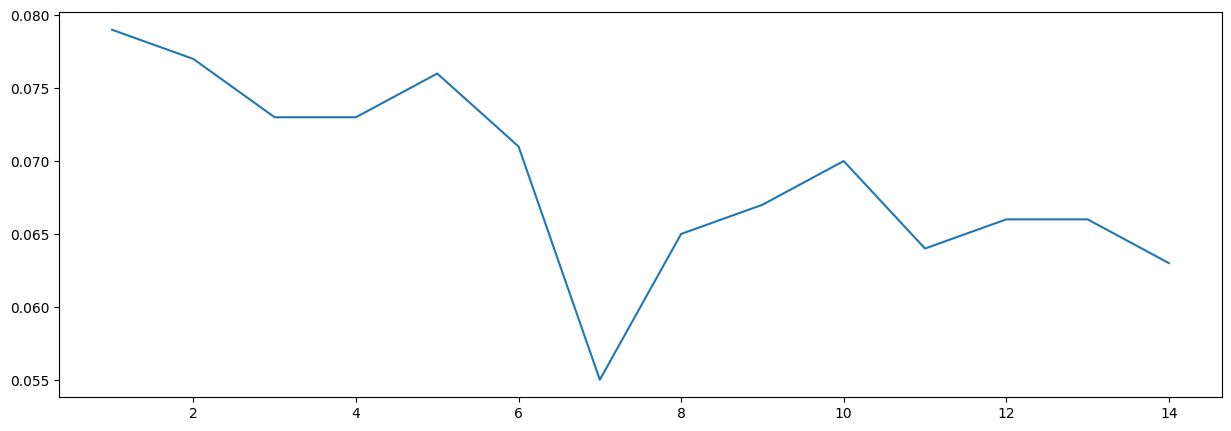

In [95]:
plt.figure(figsize=(15,5))
x=np.arange(1,15)
y=mape_values
plt.plot(x,y)

##### MA(q) model

In [96]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape_values_q=[]
for i in range(1,15):
    model = SARIMAX(train_x['english'], order=(0, 0, i))
    model = model.fit(disp=False)
    test_x['pred'] = model.forecast(steps=12)
    mape_values_q.append(round(mape(test_x['english'], test_x['pred']), 3))

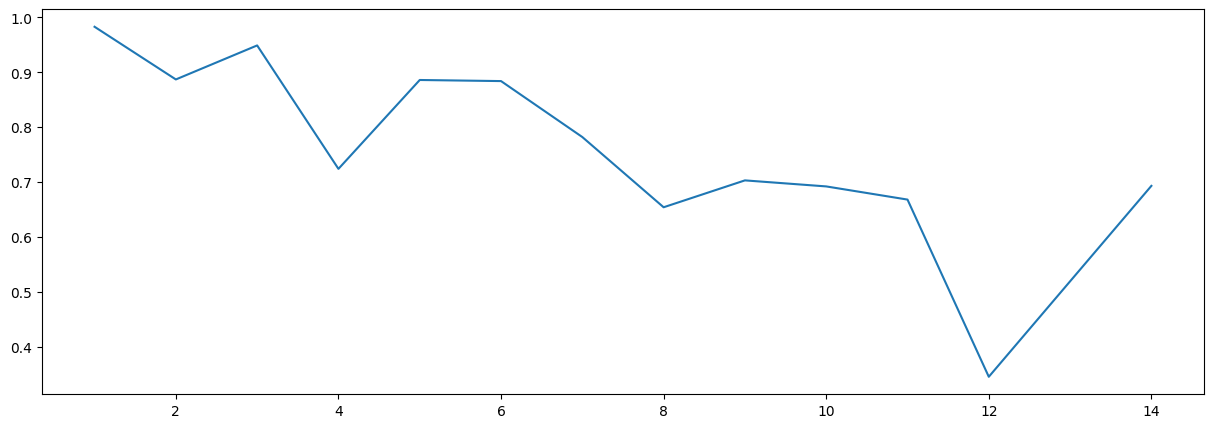

In [97]:
plt.figure(figsize=(15,5))
x=np.arange(1,15)
y=mape_values_q
plt.plot(x,y)

In [98]:
# from pure AR and pure MA model, we can observe that best value of p is 7 and best value of q is also 8.(elbow method)

##### Grid search for best p and q

In [100]:
ar = [4,5,6,7,8]
ma = [5,6,7,8,9]

In [101]:
from sklearn.metrics import mean_absolute_percentage_error as mape
# mape_values_q=
result = []
for p in ar:
    for q in ma:
        model = SARIMAX(train_x['english'], order=(p, 0, q))
        model = model.fit(disp=False)
        test_x['pred'] = model.forecast(steps=12)
        # mape_values_q.append(round(mape(test_x['english'], test_x['pred']), 3))
        result.append([p,q,round(mape(test_x['english'], test_x['pred']), 3)])

In [102]:
pd.DataFrame(result, columns=["p","q","mape"]).sort_values(by="mape",ascending=True)

,p,q,mape
14,6,9,0.056
20,8,5,0.059
18,7,8,0.059
0,4,5,0.060
1,4,6,0.060
17,7,7,0.060
15,7,5,0.061
23,8,8,0.061
24,8,9,0.061
21,8,6,0.062


In [103]:
### Best value using grid search is p=6 and q=9

MAE : 30.06
RMSE : 36.022
MAPE: 0.062


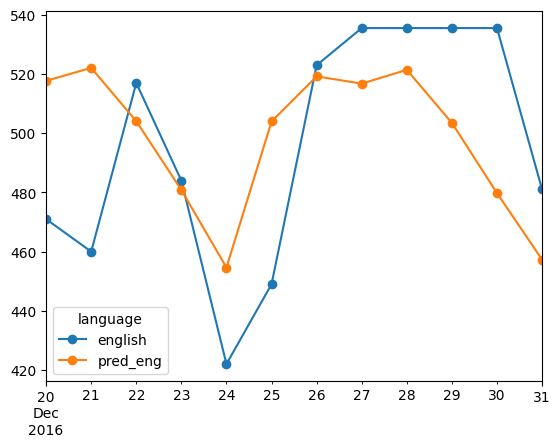

In [104]:
model_ARIMA = SARIMAX(train_x.english, order=(6, 1, 9))
model_ARIMA = model_ARIMA.fit(disp=False)
test_x['pred_eng'] = model_ARIMA.forecast(steps=12)
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])

#### SARIMA (p,d,q,P,D,Q,s)

In [105]:
ar_seasonal = [2,3]
ma_seasonal = [2,3]

result = []
for P in ar_seasonal:
    for Q in ma_seasonal:
        model = SARIMAX(train_x["english"],  order=(6,1,9),seasonal_order=(P,1,Q,14))
        model = model.fit(disp=False)
        test_x['pred'] = model.forecast(steps=12)
        result.append([P,Q,round(mape(test_x["english"], test_x['pred']), 3)])

In [106]:
pd.DataFrame(result, columns=["P","Q","mape"]).sort_values(by="mape",ascending=True)

,P,Q,mape
0,2,2,0.058
2,3,2,0.058
3,3,3,0.059
1,2,3,0.062


In [107]:
## P=2 & Q=2 are best param

MAE : 26.957
RMSE : 36.412
MAPE: 0.058


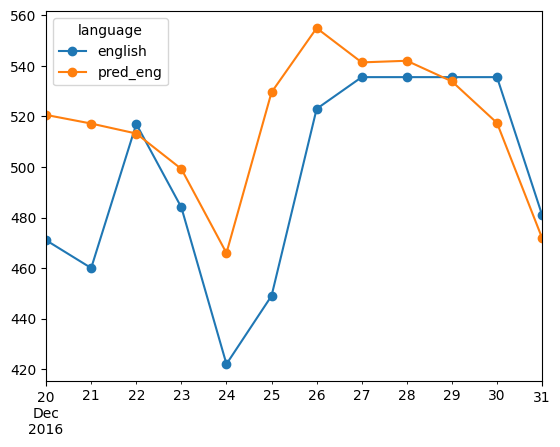

In [108]:
model_SARIMA = SARIMAX(train_x.english, order=(6, 1, 9),seasonal_order=(2,1,2,14))
model_SARIMA = model_SARIMA.fit(disp=False)
test_x['pred_eng'] = model_SARIMA.forecast(steps=12)
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])

#### SARIMA with 95% C.I

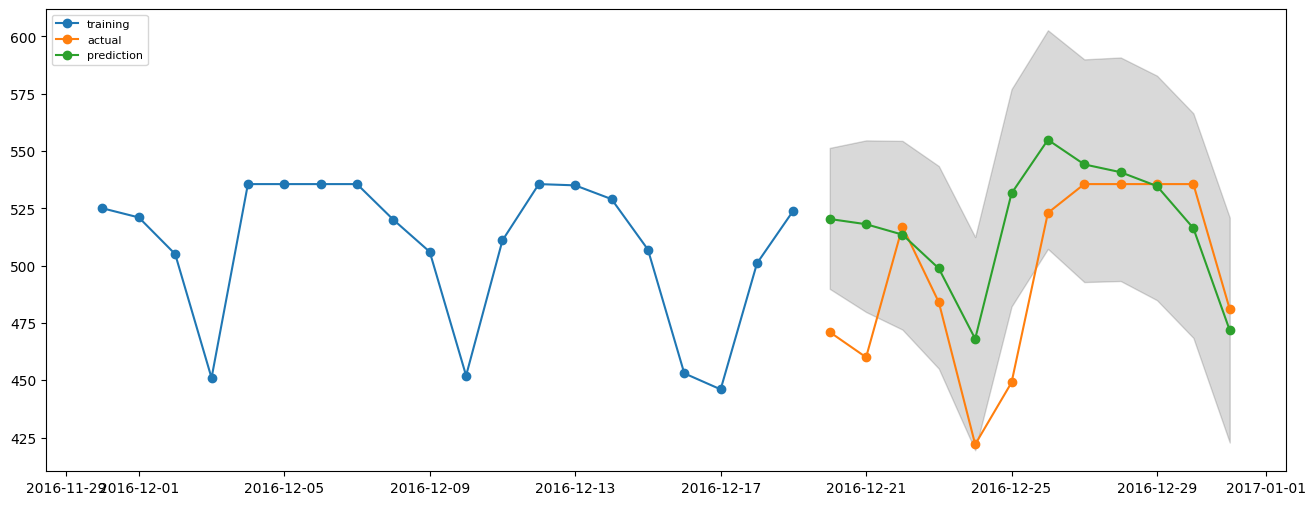

In [109]:
plt.figure(figsize=(16,6))
test_x[['lower', 'upper']] = model_SARIMA.get_forecast(steps=12).conf_int(0.05).values
plt.plot(train_x['english'][-20:], '-o', label='training')
plt.plot(test_x['english'], '-o', label='actual')
plt.plot(test_x['pred'], '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### SARIMAX

In [110]:
dff.head(1)

language,chinese,english,french,german,japanese,russian,spanish,exog
2015-07-01,72.0,243.0,101.98,103.0,172.0,189.98,368.0,0


In [111]:
start=len(train_x)
end=len(train_x)+len(test_x)-1

MAE : 28.2
RMSE : 35.256
MAPE: 0.06


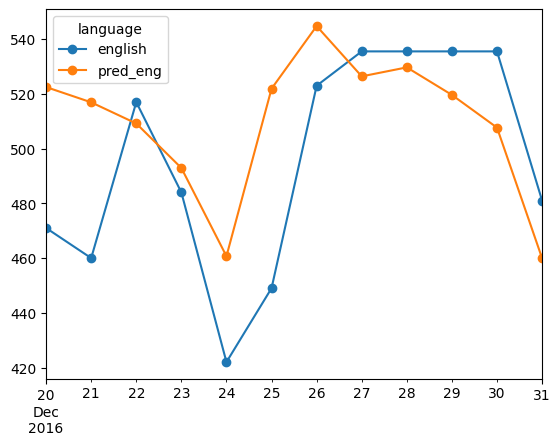

In [112]:
model_SARIMAX = SARIMAX(train_x['english'],exog=train_x['exog'],order=(6,1,9),seasonal_order=(2,1,2,14),enforce_invertibility=False)
results = model_SARIMAX.fit()
test_x['pred_eng'] = results.predict(start=start, end=end, exog=test_x['exog']).rename('Predictions')
test_x[['english','pred_eng']].plot(style='-o')
performance(test_x['english'], test_x['pred_eng'])

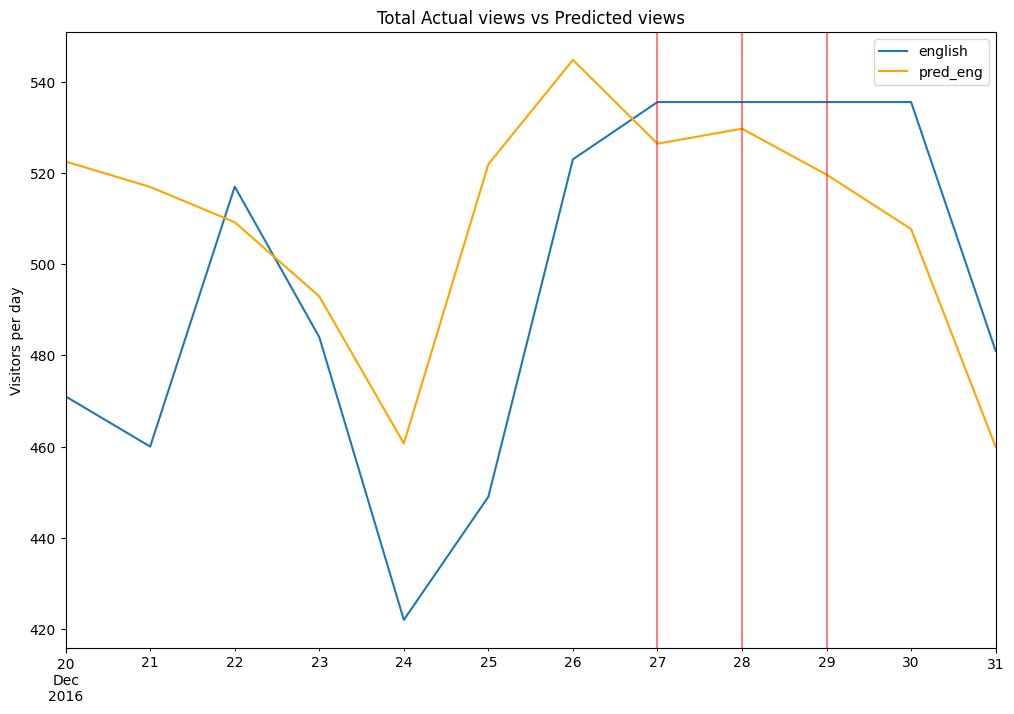

In [116]:

# Plot predictions against known values
title='Total Actual views vs Predicted views'
ylabel='Visitors per day'
xlabel=''

ax = test_x['english'].plot(legend=True,figsize=(12,8),title=title)
test_x['pred_eng'].plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test_x.query('exog==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5);

In [117]:
### SARIMAX model is able to detect some highs due to exogeneous variable and  able to bring down the value after nullying fying the effect of external factor.

#### Changepoints

In [132]:
plt.figure(figsize=(15,6))
def plot_changepoints(signal, changepoints):
  for cp in changepoints:
    plt.axvline(x=cp, color='#FA8072')
  plt.plot(signal, '-*', label='signal')

  start = 0
  trends = np.array([])
  for i in changepoints:
    x = np.arange(start, i)
    y = signal[start:i]
    l1 = np.polyfit(x, y, deg=1)
    trend = x*l1[0] + l1[1]
    trends = np.append(trends, trend)
    start = i

  plt.plot(trends, label='trend')
  plt.legend()
  plt.show()

<Figure size 1500x600 with 0 Axes>

In [159]:
# df_temp=dff.copy()
# # # df_new = df_temp.set_index('ndex')
# # df_temp.index
# df_temp=df_temp.reset_index()
# df_temp.columns

Index(['index', 'chinese', 'english', 'french', 'german', 'japanese',
       'russian', 'spanish', 'exog'],
      dtype='object', name='language')

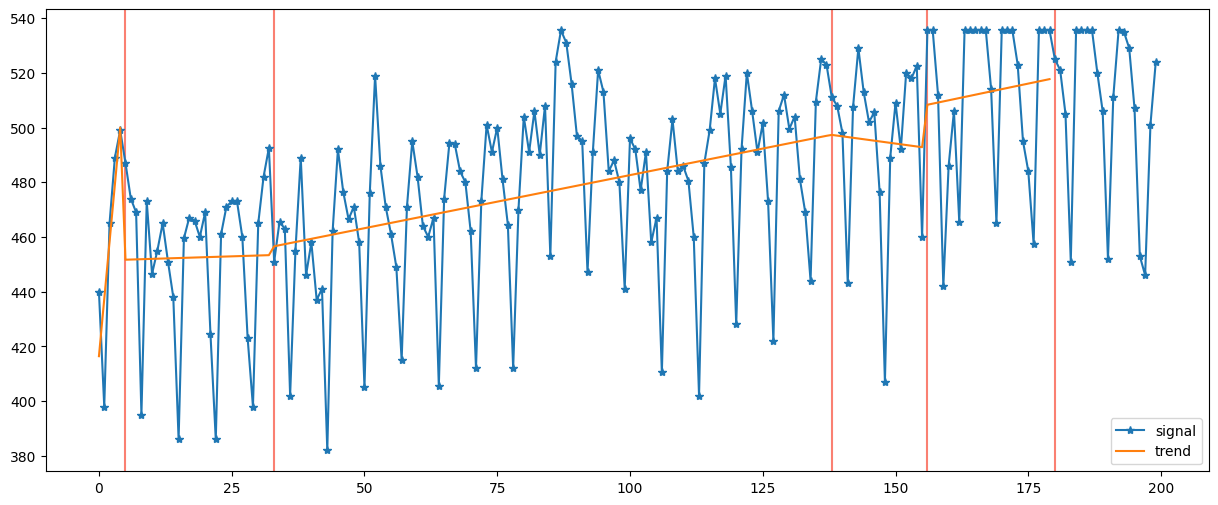

In [181]:
plt.figure(figsize=(15,6))
signal = train_x['english'][-200:] # Stationarise for mean as cost function
window=8

def get_slope(y):
  return np.polyfit(np.arange(len(y)), y, deg=1)[0]

changepoints = signal.loc[abs(signal.rolling(window, center=True).apply(get_slope).diff()) > 7.5].index

# converting to index from dates
temp = signal.reset_index()
changepoints = temp.loc[temp['index'].isin(changepoints)].index.tolist()
plot_changepoints(signal.values, changepoints)

In [182]:
### Here we can see all the change points due to exogeneous variable.

#### FB Prophet

In [192]:
df_prop=dff.copy()
df_prop.reset_index(inplace=True)
df_prop=df_prop.drop(columns=['chinese','french','german','japanese','russian','spanish'])
df_prop=df_prop.rename(columns={"index":"ds","english":"y","exog":"exog"})

In [193]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
 2   exog    550 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [194]:
df_prop.shape

(550, 3)

In [196]:
df_prop_train = df_prop.iloc[:520]
df_prop_test = df_prop.iloc[520:]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2getlb_/clnomtlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2getlb_/vln_i_fx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62488', 'data', 'file=/tmp/tmpv2getlb_/clnomtlo.json', 'init=/tmp/tmpv2getlb_/vln_i_fx.json', 'output', 'file=/tmp/tmpv2getlb_/prophet_modelpn7pznpk/prophet_model-20240215083421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


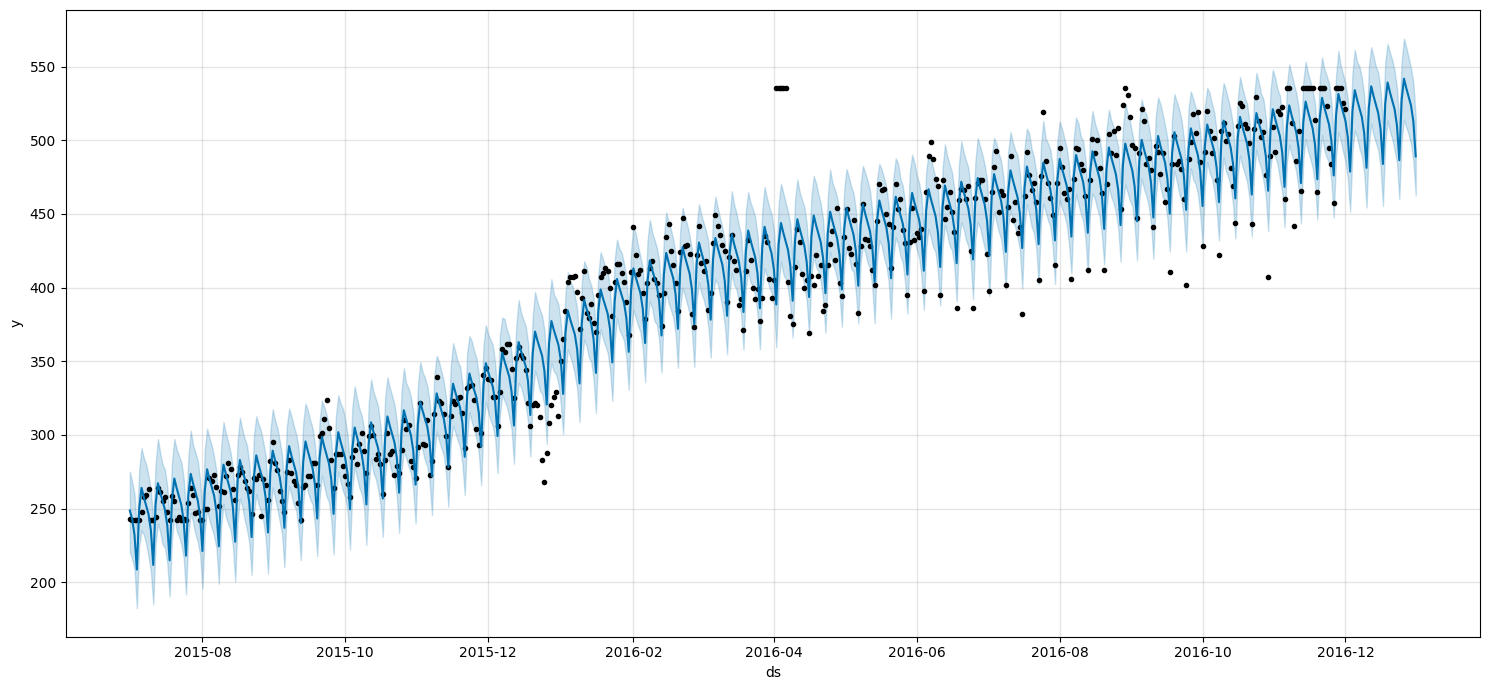

In [218]:
## WITHOUT EXOGENEOUS
model_1=Prophet()
model_1.fit(df_prop_train)
future = model_1.make_future_dataframe(periods=30,freq="D")
forecast = model_1.predict(df_prop)
fig = model_1.plot(forecast,figsize=(15,7))

In [217]:
#without exogeneous
performance(df_prop_test['y'],forecast['yhat'][-30:])

MAE : 21.294
RMSE : 30.56
MAPE: 0.045


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2getlb_/o8ug9x19.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv2getlb_/jzwynmue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81833', 'data', 'file=/tmp/tmpv2getlb_/o8ug9x19.json', 'init=/tmp/tmpv2getlb_/jzwynmue.json', 'output', 'file=/tmp/tmpv2getlb_/prophet_modelt3754yyk/prophet_model-20240215080607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


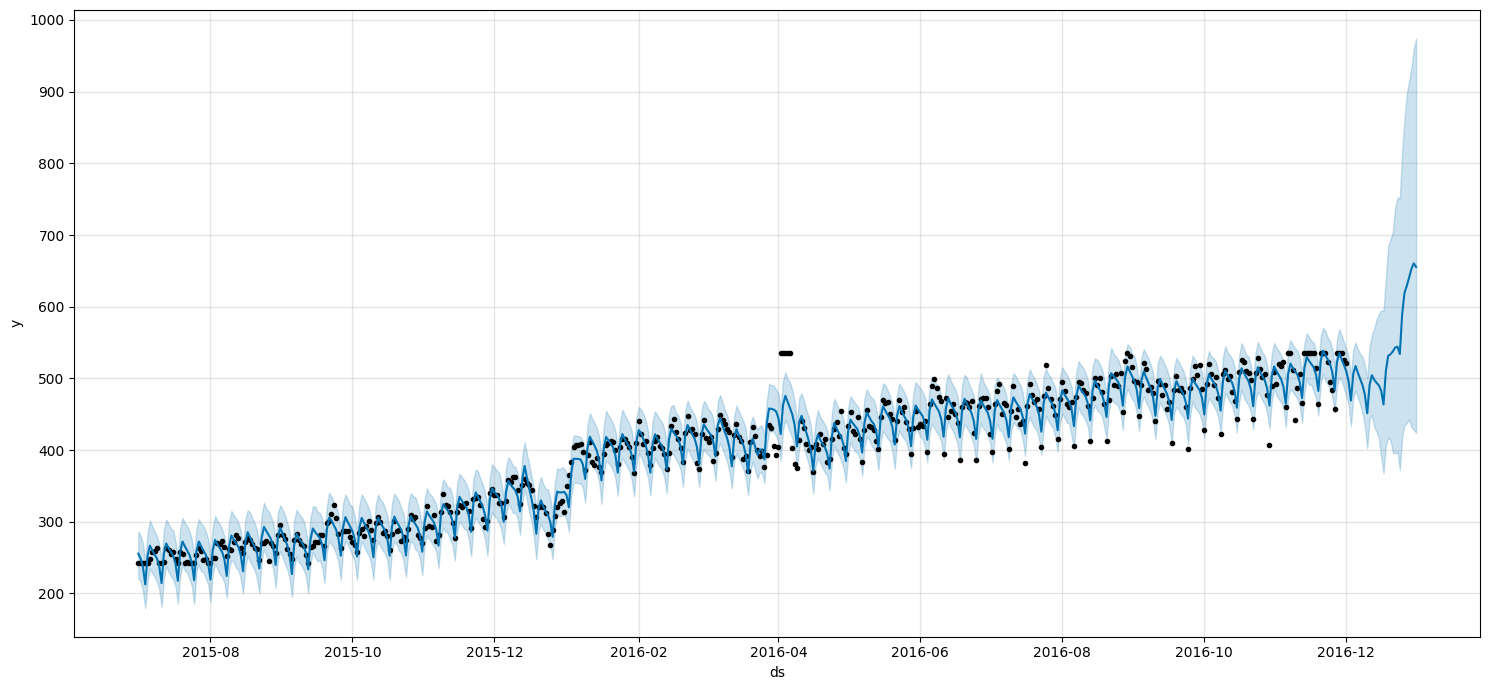

In [207]:
model_prophet=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,
               changepoint_prior_scale=4)
model_prophet.fit(df_prop_train)
future = model_prophet.make_future_dataframe(periods=30,freq="D")
forecast_prop = model_prophet.predict(df_prop)
fig = model_prophet.plot(forecast_prop,figsize=(15,7))


In [208]:
performance(df_prop_test['y'],forecast_prop['yhat'][-30:])

MAE : 53.119
RMSE : 69.87
MAPE: 0.107


In [209]:
forecast_prop.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,64.123008,220.768363,286.260891,64.123008,64.123008,191.461900,191.461900,191.461900,6.744590,6.744590,6.744590,184.717310,184.717310,184.717310,0.0,0.0,0.0,255.584908
1,2015-07-02,64.337962,216.622401,280.644221,64.337962,64.337962,184.467261,184.467261,184.467261,0.684460,0.684460,0.684460,183.782801,183.782801,183.782801,0.0,0.0,0.0,248.805223
2,2015-07-03,64.552915,203.749740,269.351996,64.552915,64.552915,172.418637,172.418637,172.418637,-10.632107,-10.632107,-10.632107,183.050743,183.050743,183.050743,0.0,0.0,0.0,236.971552


In [210]:
forecast_prop.shape

(550, 19)

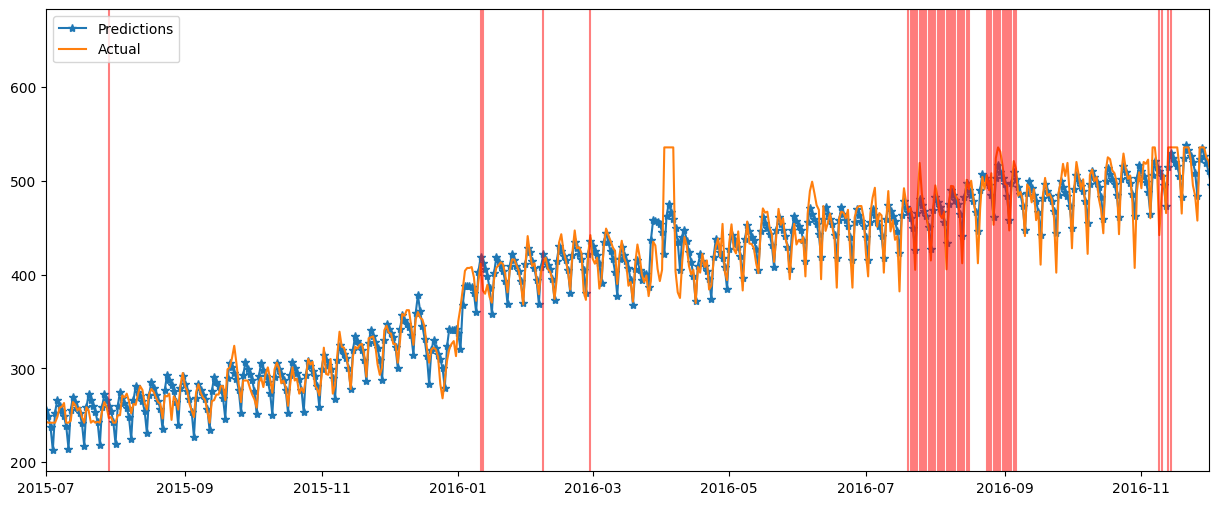

In [213]:
plt.figure(figsize=(15,6))
plt.plot(forecast_prop['ds'], forecast_prop['yhat'],'-*', label = 'Predictions')
plt.plot(df_prop['ds'], df_prop['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2016-12-01'))
for x in df_prop.query('exog==1')['ds']:
    plt.axvline(x=x, color='red', alpha = 0.5);
plt.legend()

In [214]:
# fb Prophet has marked all the change points wuth vertical red line.
# We are getting MAPE 0.107 fro fb prophet.

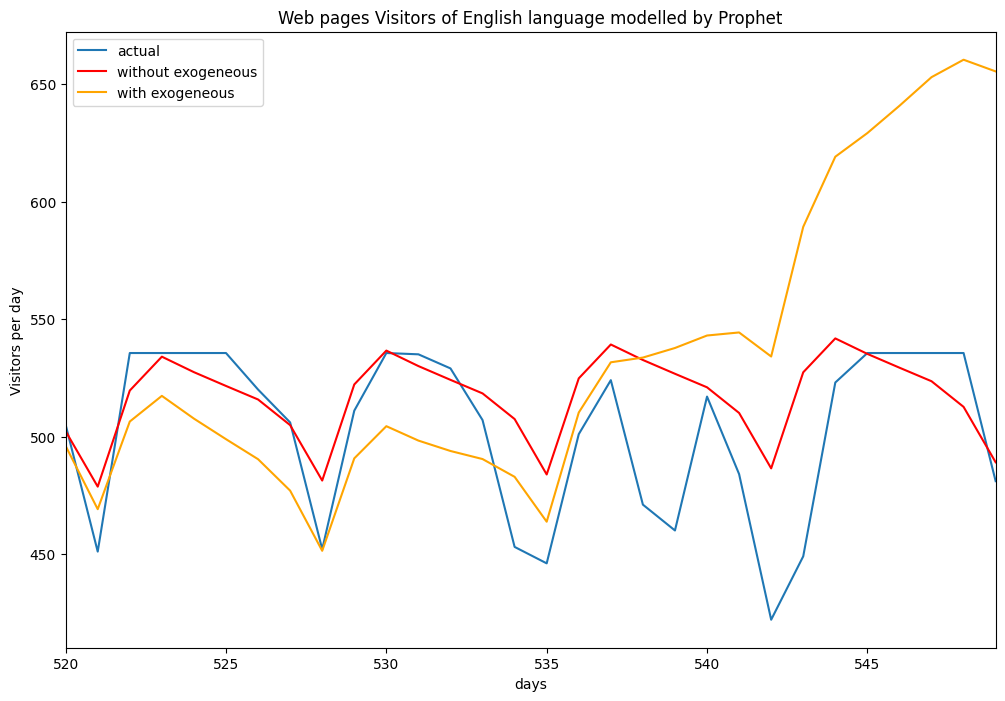

In [222]:

# Plot predictions against known values
title='Web pages Visitors of English language modelled by Prophet'
ylabel='Visitors per day'
xlabel='days'
ax = df_prop_test['y'].plot(legend=True,figsize=(12,8),title=title,label='actual')
forecast['yhat'][520:].plot(legend=True,color = 'red',label='without exogeneous')
forecast_prop['yhat'][520:].plot(legend=True,color = 'orange',label='with exogeneous')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

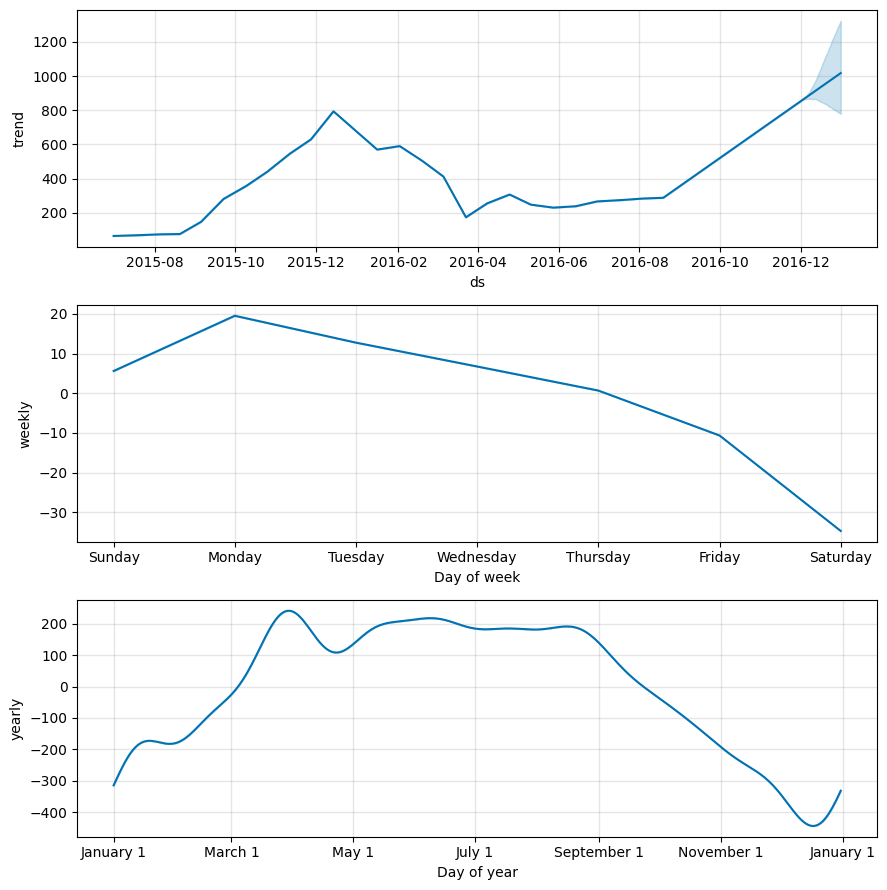

In [224]:
fig = model_prophet.plot_components(forecast_prop)

In [225]:
## We can observe the trend that views peaks at start of the week and then gradually go down at the end of the week.
## Also we can observe the trend is low at start of year or around winter season and then peaks in the middle of the year i.e. summer season.

**SUMMARY**

***  MAPE FOR ALL MODELS fro english view ***


*   ***Mean model*** = 0.195
*   ***Naive forecast*** = 0.078
*   ***Seasonal Anive forecast*** = 0.078
*   ***Holt-Winter's Model(TES)*** = 0.061
*   ***ARIMA*** = 0.062
*   ***SARIMA*** = 0.058
*   ***SARIMAX*** = 0.06
*   ***FB PROPHET***
>           1.  WITHOUT EXOGENEOUS VARIABLE = 0.045
>           2.  WITH EXOGENEOUS VARIABLE = 0.107















**Pipeline**

In [226]:
df_final_train = dff[:500]
df_final_test = dff[500:]

In [233]:
start=len(df_final_train)
end=len(df_final_train)+len(df_final_test)-1

In [237]:
all_lang=list(dff.columns[:-1])

In [238]:
type(all_lang)

list

In [239]:
for i in all_lang:
  print("Performance Metrics after SARIMAX for ",i)
  model_SARIMAX = SARIMAX(train_x[i],exog=train_x['exog'],order=(6,1,9),seasonal_order=(2,1,2,14),enforce_invertibility=False)
  results = model_SARIMAX.fit()
  test_x['pred_FINAL'] = results.predict(start=start, end=end, exog=test_x['exog']).rename('Predictions')
  performance(test_x[i], test_x['pred_FINAL'])

Performance Metrics after SARIMAX for  chinese
MAE : 3.914
RMSE : 4.775
MAPE: 0.035
Performance Metrics after SARIMAX for  english
MAE : 28.2
RMSE : 35.256
MAPE: 0.06
Performance Metrics after SARIMAX for  french
MAE : 20.009
RMSE : 23.356
MAPE: 0.114
Performance Metrics after SARIMAX for  german
MAE : 15.749
RMSE : 17.245
MAPE: 0.115
Performance Metrics after SARIMAX for  japanese
MAE : 9.306
RMSE : 12.401
MAPE: 0.039
Performance Metrics after SARIMAX for  russian
MAE : 38.227
RMSE : 53.758
MAPE: 0.14
Performance Metrics after SARIMAX for  spanish
MAE : 60.391
RMSE : 66.473
MAPE: 0.278


In [ ]:
### I have choosen SARIMAX modek for pipeline, however we can choose any model.
## SARIMAX is working best for chinese language and worst for spanish langugae.

**Observation**

1. For this dataset, seasonality is stronger factor than including exogeneous factor.
2. There are 3 types of access_type in which 50% of them are all access and almost 20-20% for mobile web and desktop.
3. Views on english language is most while spanish has least amount of view.
4. There are 2 types of access_origin where all agents has 70% of origin while spider has 30%.
5. We can observe the trend that views peaks at start of the week and then gradually go down at the end of the week, i.e. high on SUnday,Monday,Tuesday and low on Thursday,Friday and least on Saturday.
6. Also we can observe the trend is low at start of year or around winter season and then peaks in the middle of the year i.e. summer season.

**Recommendation**

1. Revenue through ads can be more generated on Sunday,Monday and tuesday and in the summer season.

2. Also ADEase focus on english langugae for most of the ads reveenue. and should plan for increasing views for the spanish, russian and chinese viewers.

**Questionnaire**:

1. Defining the problem statements and where can this and modifications of this be used?
=> As Data Science team of Ad ease, we are trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that AdEase can predict and optimize the ad placement for the clients.

2. Write 3 inferences you made from the data visualizations.
=> 1). English has highest number of viewers while russian and spanish has least number of viewers.
2). On Sunday, Monday and tuesday, AdEase can earn most, since these are days of the most viewers. While friday and saturday gets least number of viewers.
3). Summer (Mar-Aug) has typically more number of viewers than winter(Nov- Feb).

3. What does the decomposition of series do?
=> Decomposition of time series involves breaking down a time series into its constituent components, typically trend, seasonality, and residual (or error) components. This process helps in understanding the underlying patterns and variations within the data, which can aid in forecasting and analysis. Trend represents the long-term direction or pattern, seasonality captures recurring patterns at fixed intervals, and residual accounts for random fluctuations or noise in the data.

4. What level of differencing gave you a stationary series?
=> First level of differencing gave us the stationary series for our english dataset.

5. Difference between arima, sarima & sarimax.

=> **ARIMA** (AutoRegressive Integrated Moving Average): ARIMA models are used to model time series data that exhibit temporal dependencies and can be decomposed into autoregressive (AR), differencing (I), and moving average (MA) components. ARIMA models are suitable for stationary time series data.
**SARIMA** (Seasonal AutoRegressive Integrated Moving Average): SARIMA models extend ARIMA by incorporating seasonal components, making them suitable for time series data with seasonal patterns. SARIMA models include additional parameters to account for seasonal variations in the data.
**SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with eXogenous variables): SARIMAX models are an extension of SARIMA that allow for the inclusion of exogenous variables, which are external factors that can influence the time series data. These models can capture both seasonal patterns and the impact of external factors on the time series.

6. Compare the number of views in different languages.
=> Percentage of different language
language
english     16.62%
japanese    14.08 %
german      12.79 %
french      12.27 %
chinese     11.88 %
russian     10.36 %
spanish      9.70 %

7. What other methods other than grid search would be suitable to get the model for all languages?
=> Auto ARIMA, confidence interval detection, FB Prophet are the other methods other than hyper parameter tuning ( grid search) that would be suitable to get the model for all languages